### Imports

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Analysis of the data

In [2]:
data = 'swedish_population_by_year_and_sex_1860-2022.csv'

In [5]:
df = pd.read_csv(data)
df

,age,sex,1860,1861,1862,1863,1864,1865,1866,1867,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,men,60589,59797,62371,61515,61931,60998,63036,58645,...,58649,59584,59994,61005,59899,60032,59476,58485,58692,54095
1,0,women,58837,58136,60041,59384,60100,59622,60874,56586,...,55359,56296,55884,58018,56715,56807,55907,55104,55971,51091
2,1,men,56001,54544,52933,55776,57346,57776,57017,59071,...,59039,59489,60640,61352,62531,60973,60993,60058,59195,59411
3,1,women,54833,53762,52282,54500,55823,56641,56263,57539,...,55884,56083,57292,57216,59444,57789,57783,56533,55855,56712
4,2,men,52502,54062,51613,50710,53743,55227,55696,55254,...,58721,59807,60292,61817,62258,63361,61598,61348,60596,59723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,108,women,0,0,0,0,0,0,0,0,...,6,8,5,3,3,10,7,9,4,8
218,109,men,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
219,109,women,0,0,0,0,0,0,0,0,...,4,2,6,3,3,1,6,2,6,1
220,110+,men,0,0,0,0,0,0,0,0,...,1,1,1,1,0,3,0,0,0,0


In [6]:
# Check the general structure of the dataset
df.describe()

,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,17386.162162,17623.864865,17826.581081,18070.504505,18291.918919,18508.846847,18721.824324,18891.126126,18892.121622,18828.959459,...,43445.333333,43907.004505,44373.950450,45023.211712,45586.675676,46081.914414,46520.671171,46753.581081,47082.549550,47394.396396
std,15645.403470,15839.298441,16001.893327,16206.160923,16420.421660,16585.922221,16784.191438,16916.504279,16795.995343,16636.004985,...,23925.183617,24100.434583,24284.013334,24590.958159,24838.714952,25029.843005,25155.082552,25190.251984,25235.572786,25302.509000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1151.500000,1227.750000,1236.750000,1277.500000,1258.500000,1255.750000,1249.500000,1181.250000,1368.250000,1271.750000,...,23423.750000,23503.500000,24530.250000,24218.000000,24466.000000,25000.500000,25636.500000,26880.500000,27366.000000,28946.250000
50%,13641.000000,14576.000000,14665.500000,14617.500000,14492.500000,14856.500000,15968.500000,16018.500000,17018.500000,17424.000000,...,55896.000000,56367.000000,56820.500000,57213.500000,57393.000000,57578.500000,57689.000000,57620.500000,57468.500000,57508.000000
75%,30140.000000,30429.000000,30371.000000,30739.000000,30680.250000,30936.000000,31234.750000,31301.500000,31130.500000,30608.000000,...,60710.750000,61194.500000,61421.500000,62341.750000,62943.250000,63559.000000,64155.250000,64231.250000,64387.500000,64586.000000
max,60589.000000,59797.000000,62371.000000,61515.000000,61931.000000,60998.000000,63036.000000,59071.000000,56706.000000,54322.000000,...,71269.000000,72659.000000,74108.000000,76198.000000,77718.000000,78928.000000,80028.000000,80578.000000,81453.000000,82506.000000


In [7]:
# The data has been suplied in wide format, it is useful to unpivot the data
# 'age' & 'sex' kept as identifier variables
# 'year' unpivoted column
# 'ppl' name to the column containing the values from unpivoted columns
pivoted = pd.melt(df, id_vars=['age', 'sex'], var_name="year", value_name="ppl")
pivoted

,age,sex,year,ppl
0,0,men,1860,60589
1,0,women,1860,58837
2,1,men,1860,56001
3,1,women,1860,54833
4,2,men,1860,52502
...,...,...,...,...
36181,108,women,2022,8
36182,109,men,2022,0
36183,109,women,2022,1
36184,110+,men,2022,0


In [8]:
# Create columns for "children", "elderly" & "laborforce"
pivoted["children"]= 0
pivoted["elderly"] = 0
pivoted["laborforce"] = 0
pivoted

,age,sex,year,ppl,children,elderly,laborforce
0,0,men,1860,60589,0,0,0
1,0,women,1860,58837,0,0,0
2,1,men,1860,56001,0,0,0
3,1,women,1860,54833,0,0,0
4,2,men,1860,52502,0,0,0
...,...,...,...,...,...,...,...
36181,108,women,2022,8,0,0,0
36182,109,men,2022,0,0,0,0
36183,109,women,2022,1,0,0,0
36184,110+,men,2022,0,0,0,0


In [9]:
# Clean the values that state +100 to just 110
pivoted['age'] = pivoted['age'].replace('110+', 110)
pivoted

,age,sex,year,ppl,children,elderly,laborforce
0,0,men,1860,60589,0,0,0
1,0,women,1860,58837,0,0,0
2,1,men,1860,56001,0,0,0
3,1,women,1860,54833,0,0,0
4,2,men,1860,52502,0,0,0
...,...,...,...,...,...,...,...
36181,108,women,2022,8,0,0,0
36182,109,men,2022,0,0,0,0
36183,109,women,2022,1,0,0,0
36184,110,men,2022,0,0,0,0


In [15]:
# Previous checks before operations
print(pivoted['age'].dtype)
print(pivoted['year'].dtype)

# We can see that they're being treated as strings in pandas
print(pivoted['age'].unique())
print(pivoted['year'].unique())

int64
int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110]
[1860 1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873
 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887
 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901
 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943
 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
 1958 1959 1960 1961 1962 1963 1964 196

In [11]:
# We must convert the argument to a numeric type
pivoted[['age','year']] = pivoted[['age','year']].apply(pd.to_numeric)

In [12]:
# Categorize ages into groups
pivoted.loc[(pivoted.age < 15), 'AgeGroup'] = 'children'  # Age 0-14: children
pivoted.loc[((pivoted.age > 14) & (pivoted.age < 65)), 'AgeGroup'] = 'laborforce'  # Age 15-64: labor force
pivoted.loc[(pivoted.age > 64), 'AgeGroup'] = 'elderly'  # Age 65+: elderly
pivoted

,age,sex,year,ppl,children,elderly,laborforce,AgeGroup
0,0,men,1860,60589,0,0,0,children
1,0,women,1860,58837,0,0,0,children
2,1,men,1860,56001,0,0,0,children
3,1,women,1860,54833,0,0,0,children
4,2,men,1860,52502,0,0,0,children
...,...,...,...,...,...,...,...,...
36181,108,women,2022,8,0,0,0,elderly
36182,109,men,2022,0,0,0,0,elderly
36183,109,women,2022,1,0,0,0,elderly
36184,110,men,2022,0,0,0,0,elderly


In [13]:
# Group data by year and age group, sum population
dr_table = pivoted.groupby(['year','AgeGroup']).sum()['ppl'].reset_index()
dr_table

,year,AgeGroup,ppl
0,1860,children,1292962
1,1860,elderly,201645
2,1860,laborforce,2365121
3,1861,children,1318714
4,1861,elderly,208106
...,...,...,...
484,2021,elderly,2118766
485,2021,laborforce,6494457
486,2022,children,1829093
487,2022,elderly,2147137


In [14]:
# Reset index and set 'year' as the new index
dr_table = dr_table.reset_index().set_index('year')
dr_table

,index,AgeGroup,ppl
year,,,
1860,0,children,1292962
1860,1,elderly,201645
1860,2,laborforce,2365121
1861,3,children,1318714
1861,4,elderly,208106
...,...,...,...
2021,484,elderly,2118766
2021,485,laborforce,6494457
2022,486,children,1829093


In [30]:
# Pivot the table to have age groups as columns
dr_table = dr_table.pivot(columns = 'AgeGroup')
dr_table

ppl                    
AgeGroup children  elderly laborforce
year                                 
1860      1292962   201645    2365121
1861      1318714   208106    2385678
1862      1338720   212807    2405974
1863      1362024   217661    2431967
1864      1380235   219574    2460997
...           ...      ...        ...
2018      1819729  2035711    6374745
2019      1834821  2065367    6427401
2020      1837798  2088086    6453411
2021      1839103  2118766    6494457
2022      1829093  2147137    6545326

[163 rows x 3 columns]

In [31]:
# Remove the top level of the multi-level column index
dr_table.columns = dr_table.columns.droplevel()
dr_table.columns

Index(['children', 'elderly', 'laborforce'], dtype='object', name='AgeGroup')

In [35]:
# Calculate the dependency ratio
# Formula: (children + elderly) / labor force * 100
dr_table['Dependency ratio'] = dr_table.apply(lambda x : 100 * ((x['children'] + x['elderly']) / x['laborforce']), axis=1)
dr_table

AgeGroup,children,elderly,laborforce,Dependency ratio
year,,,,
1860,1292962,201645,2365121,63.193680
1861,1318714,208106,2385678,63.999417
1862,1338720,212807,2405974,64.486441
1863,1362024,217661,2431967,64.955034
1864,1380235,219574,2460997,65.006540
...,...,...,...,...
2018,1819729,2035711,6374745,60.479909
2019,1834821,2065367,6427401,60.680639
2020,1837798,2088086,6453411,60.834247


## Tasks

**(i) Plot a figure that shows the dependencty ratio of Sweden from 1860 to 2022**

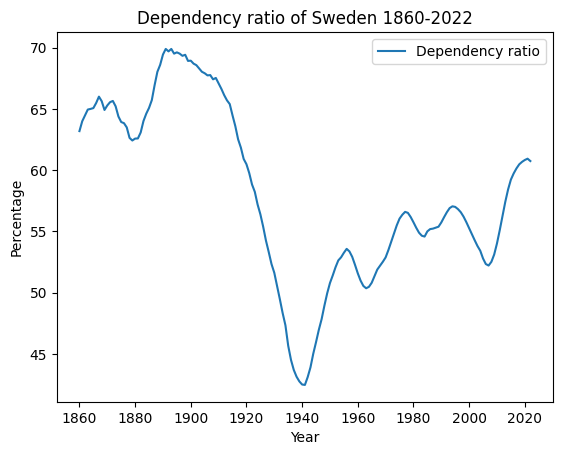

In [36]:
# Plot the dependency ratio
dr_table['Dependency ratio'].plot()
plt.title('Dependency ratio of Sweden 1860-2022')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.show()

**(ii) Plot a figure that shows the fraction of the children, the elderly, and the total dependent population of the total Swedish population from 1860 to 2022**

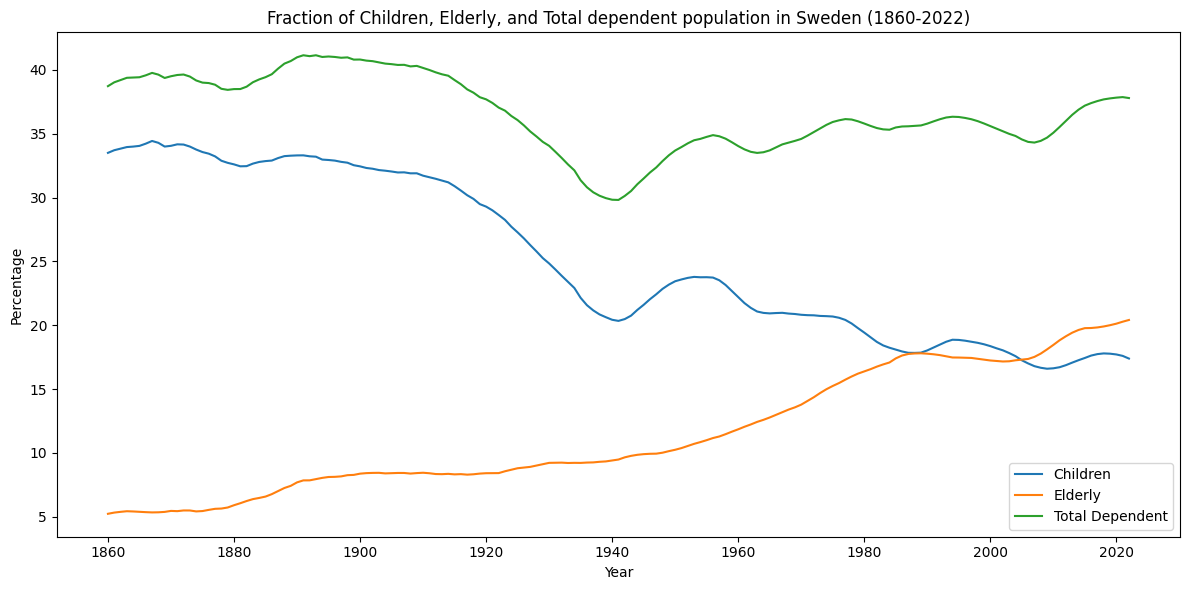

In [40]:
# Create the plot
plt.figure(figsize=(12, 6))

# Calculate and plot fractions
total_population = dr_table['children'] + dr_table['laborforce'] + dr_table['elderly']
plt.plot(dr_table.index, 100 * (dr_table['children'] / total_population), label='Children')
plt.plot(dr_table.index, 100 * (dr_table['elderly'] / total_population), label='Elderly')
plt.plot(dr_table.index, 100 * ((dr_table['children'] + dr_table['elderly']) / total_population), label='Total Dependent')

plt.title('Fraction of Children, Elderly, and Total dependent population in Sweden (1860-2022)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.tight_layout()
plt.show()

**(iii) Discuss the development of the Swedish population in light of these figures;
how have the Swedish demographics changed over the years and why, and
relate this to what you know (or can find out) about general trends of
population among industrialized countries.**

In [ ]:
# Get the correlation between different features

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(

        df.corr(numeric_only=True),
        cmap = colormap,
        square=True,
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 5 }
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)

import pandas as pd
import math
def data_visualizer(df,max_columns=60,max_rows = 20,heatmap=False, displot_kind=None):

  if not isinstance(df, pd.DataFrame):df=pd.DataFrame(df)
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)
  break_line="------------------------------------------------"
  print('data sample:')
  print(df)
  print(break_line)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_rows', None)
  print('data info:')
  print(df.info())
  print(break_line)
  print('data description:')
  print(df.describe())
  print(break_line)
  print('data nan check:')
  print(df.isna().sum())
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)

  if heatmap:
   correlation_heatmap(df)

  if displot_kind is not None:
  #  df.hist(bins=50, figsize=(20,15))
  #  plt.show()
   num_columns = int(math.sqrt(len(df.columns)))  # Define the number of columns for the grid
   num_rows = len(df.columns) // num_columns + (len(df.columns) % num_columns > 0)  # Calculate the number of rows needed

   fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

   # Flatten the axes array for easy iteration
   axes = axes.flatten()

   # Plotting each attribute in the grid
   for i, column in enumerate(df.columns):
       sns.histplot(df[column], kde=displot_kind, ax=axes[i])
       axes[i].set_title(column)

   # Remove any unused subplots
   for j in range(i + 1, len(axes)):
       fig.delaxes(axes[j])

   plt.tight_layout()
   plt.show()

dependency_ratio= pd.read_csv("swedish_population_by_year_and_sex_1860-2022.csv")
data_visualizer(dependency_ratio, heatmap=False, displot_kind=None)